## Multiple Linear Regression

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

## Data Preparation

In [3]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

std meanden büyükse outlier sorunu olabilir, min ve 25lik arasında, min ve max arasında ciddi ucurum varsa outlier olabilir

st.deviation mean'den büyükse outlier sorunu olabilir,
25 ile min veya 75 ile max. arasında ciddi bir fark varsa outlier üzerinde durulmalı.

In [9]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df, kde = True)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

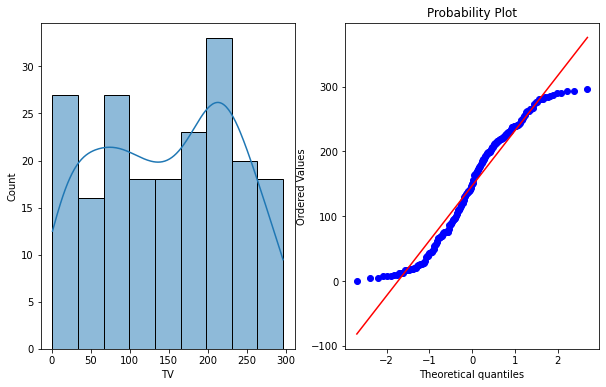

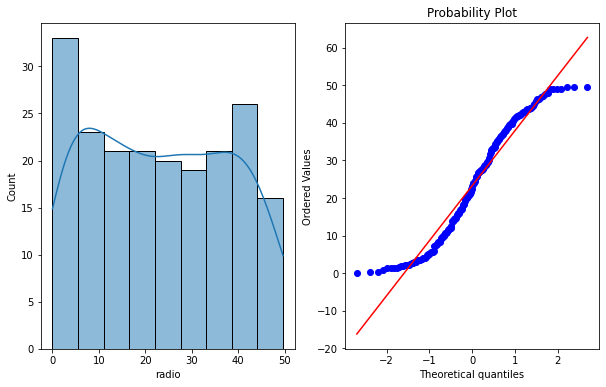

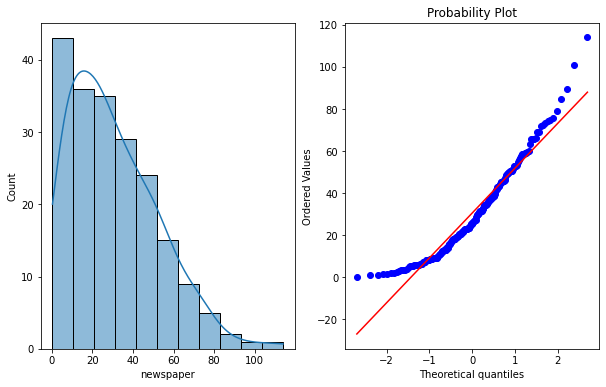

In [10]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

değerlerim line etrafında bir sarmaşık gibi dolanmışsa burda normal dağılım var diyebiliriz. ama bir tarafta sapma (line'dan uzaklaşma) varsa normal dağılımdan uzaklaşmış demektir.

In [11]:
from scipy.stats import skew
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


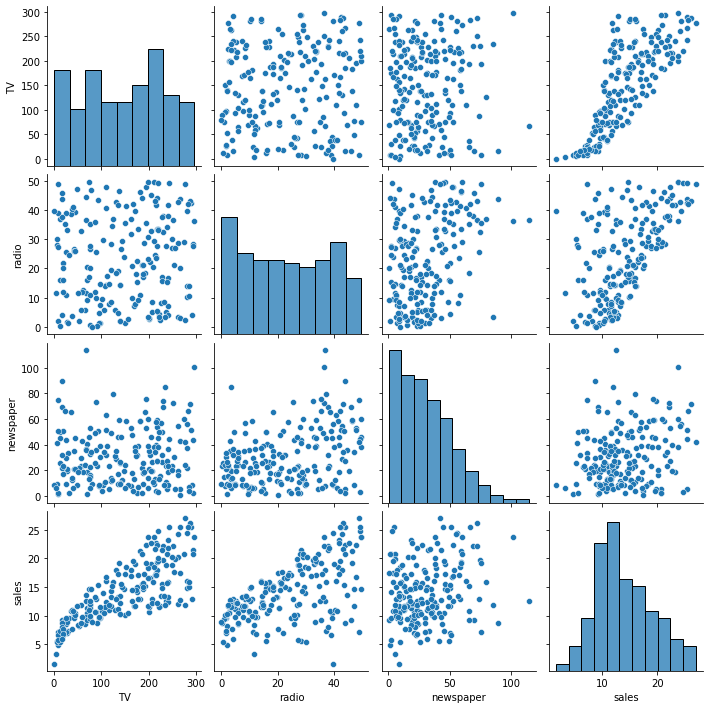

In [12]:
sns.pairplot(df)

tüm dependent feature ların independent olan target ile olan bağlılıklarına bakıyoruz. ( "hangi feature tahmin etmede daha önemli ya da değil" kararına sadece corr ile karar veremeyiz. Corr ile bir lineerity var mı ona bakarız)

skewness verinin normal dağılıma uygun olup olmadığını gösteriyor.(Simetri)

In [13]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

<AxesSubplot:>

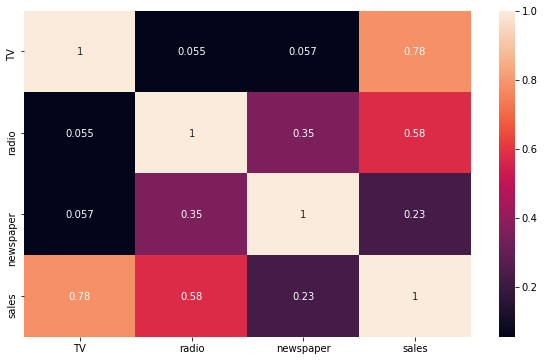

In [14]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [14]:
# pip install scikit-learn

In [34]:
X = df.drop(columns = "sales")  # df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
df.sample(15)

TV  radio  newspaper  sales
41   177.0   33.4       38.7   17.1
58   210.8   49.6       37.7   23.8
66    31.5   24.6        2.2    9.5
130    0.7   39.6        8.7    1.6
93   250.9   36.5       72.3   22.2
65    69.0    9.3        0.9    9.3
35   290.7    4.1        8.5   12.8
4    180.8   10.8       58.4   12.9
76    27.5    1.6       20.7    6.9
151  121.0    8.4       48.7   11.6
182   56.2    5.7       29.7    8.7
193  166.8   42.0        3.6   19.6
96   197.6    3.5        5.9   11.7
32    97.2    1.5       30.0    9.6
3    151.5   41.3       58.5   18.5

- X_train = eğitim featureleri
- X_test = evaluation featureleri
- y_train = eğitim target
- y_test = evaluate target

In [25]:
print("Train features shape : ", X_train.shape)
print("Train target shape : ", y_train.shape)
print("Test features shape : ", X_test.shape)
print("Test target shape : ", y_test.shape)

Train features shape :  (140, 3)
Train target shape :  (140,)
Test features shape :  (60, 3)
Test target shape :  (60,)


In [27]:
X_test.head()

TV  radio  newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2

In [28]:
X_train.head()

TV  radio  newspaper
169  284.3   10.6        6.4
97   184.9   21.0       22.0
31   112.9   17.4       38.6
12    23.8   35.1       65.9
35   290.7    4.1        8.5

In [29]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64

In [31]:
y_train.head()

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [35]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [42]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}

In [43]:
comparing = pd.DataFrame(my_dict)
comparing

Actual       pred  residual
95     16.9  16.565396  0.334604
15     22.4  21.188228  1.211772
30     21.4  21.551071 -0.151071
158     7.3  10.889238 -3.589238
128    24.7  22.202320  2.497680
115    12.6  13.355569 -0.755569
69     22.3  21.196925  1.103075
170     8.4   7.350285  1.049715
174    11.5  13.275471 -1.775471
45     14.9  15.124495 -0.224495
66      9.5   9.014430  0.485570
182     8.7   6.525428  2.174572
165    11.9  14.302060 -2.402060
78      5.3   8.970260 -3.670260
186    10.3   9.456796  0.843204
177    11.7  12.004544 -0.304544
56      5.5   8.915494 -3.415494
152    16.6  16.156193  0.443807
82     11.3  10.295829  1.004171
68     18.9  18.724736  0.175264
124    19.7  19.768218 -0.068218
16     12.5  13.774690 -1.274690
148    10.9  12.496389 -1.596389
93     22.2  21.535018  0.664982
65      9.3   7.608607  1.691393
60      8.1   5.611980  2.488020
84     21.7  20.917595  0.782405
67     13.4  11.806277  1.593723
125    10.6   9.080766  1.519234
132     5.7   8.514120 -2.814120
9      10.6  12.176049 -1.576049
18     11.3   9.969194  1.330806
55     23.7  21.730090  1.969910
75      8.7  12.777706 -4.077706
150    16.1  18.101136 -2.001136
104    20.7  20.075908  0.624092
135    11.6  14.262026 -2.662026
137    20.8  20.938265 -0.138265
164    11.9  10.839388  1.060612
76      6.9   4.381906  2.518094
79     11.0   9.513324  1.486676
197    12.8  12.404863  0.395137
38     10.1  10.170454 -0.070454
24      9.7   8.090814  1.609186
122    11.6  13.163884 -1.563884
195     7.6   5.224355  2.375645
29     10.5   9.288938  1.211062
19     14.6  14.093307  0.506693
143    10.4   8.690245  1.709755
86     12.0  11.661198  0.338802
114    14.6  15.718484 -1.118484
173    11.7  11.631569  0.068431
5       7.2  13.353607 -6.153607
126     6.6  11.153147 -4.553147
117     9.4   6.336368  3.063632
73     11.0   9.761580  1.238420
140    10.9   9.419571  1.480429
98     25.4  24.255165  1.144835
172     7.6   7.695191 -0.095191
96     11.7  12.153176 -0.453176

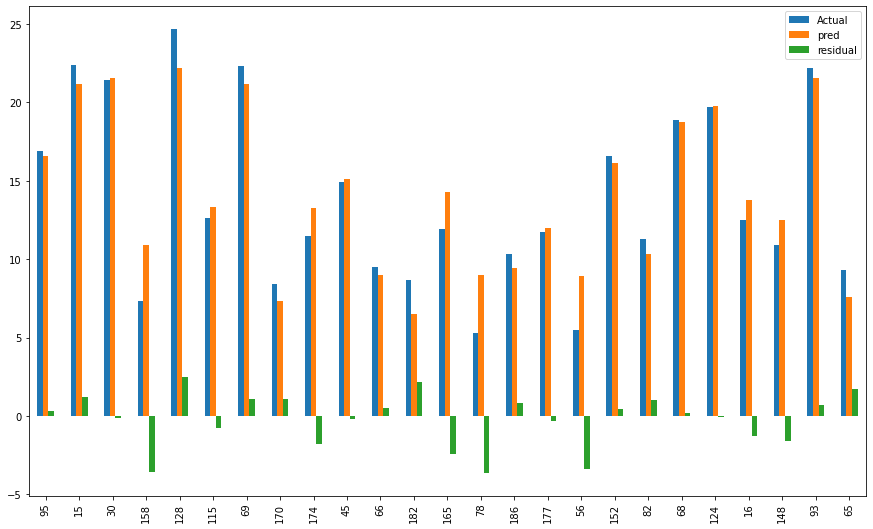

In [46]:
result_sample = comparing.head(25)
result_sample.plot(kind = "bar", figsize = (15,9))
plt.show()

## Error Metrics

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

Elimdeki veriler doğru tahmin yapabilmek için %86 oranında yeterli. %14 lük kısım benim elimde olmayan feature lardan kaynaklanıyor. Belki evde altından musluklar vardır.

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549084

In [50]:
mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446387

## What is the concept of punishment for RMSE error metric?

## Evaluation Model

## Is data suitable for linear regression?

## Plotting residuals

In [54]:
# pip install yellowbrick

## Prediction Error for LinearRegression

## Retraining Model on Full Data

## Coefficients

## Prediction on New Data

## Feature importance (The effect of features on the predicted label)